# Project 1 - Stacking Images from the ISS into a "star trails" photo

## Today's Agenda
- Download images from ISS
- Select Images to use
- Explore an easy way to stack images
- Recreate the easy way, manually
- ???
- Profit!

## Where to get images captured by the International Space Station?

https://eol.jsc.nasa.gov/Videos/CrewEarthObservationsVideos/NorthAmerica.htm

## For this notebook, I decided to use the "Stars over the Eastern United States" video. Below the text description, there are two download buttons (one for all video resolutions and for all image resolutions).


<video controls src="https://eol.jsc.nasa.gov/Videos/CrewEarthObservationsVideos/videos/starsus_iss_20120123/starsus_iss_20120123HD_web.mp4">animation</video>

## Let's download all available resolution images. This should be a zip file containing two zip files for high and low resolution images. For this notebook, we'll use the low resolution images.

# NOTE: There are a number of frames that have a solar panel array in it that might be annoying to deal with when stacking these images. I manually removed these images after visual inspection. These images are located along with this notebook in directories called "LowRes" and "HighRes".

## This notebook can be performed with the high resolution images but it may take far longer since the files are larger.

In [1]:
import os,sys
from PIL import ImageChops, Image

image_path = os.getcwd()+'/image_data/starsus_iss_20120123_imagery/LowRes/'
save_path = os.getcwd()+'/'

# Easy way

In [2]:
# The Image Library from PIL has quite a few different ways to filter/stack images

def lighter(image_path,save_path,save_filename):
    files = os.listdir(image_path) 
    finalimage=Image.open(image_path+files[0])
    
    for i in range(1,len(files)):

        currentimage=Image.open(image_path+files[i])

        finalimage=ImageChops.lighter(finalimage, currentimage)

    finalimage.save(save_path+save_filename,"JPEG")
    
def darker(image_path,save_path,save_filename):
    files = os.listdir(image_path)
    finalimage=Image.open(image_path+files[0])
    
    for i in range(1,len(files)):

        currentimage=Image.open(image_path+files[i])

        finalimage=ImageChops.darker(finalimage, currentimage)

    finalimage.save(save_path+save_filename,"JPEG")    
    
    
def difference(image_path,save_path,save_filename):
    files = os.listdir(image_path) 
    finalimage=Image.open(image_path+files[0])
    
    for i in range(1,len(files)):

        currentimage=Image.open(image_path+files[i])

        finalimage=ImageChops.difference(finalimage, currentimage)

    finalimage.save(save_path+save_filename,"JPEG")    
    
def blend(image_path,save_path,save_filename,alpha):
    files = os.listdir(image_path) 
    finalimage=Image.open(image_path+files[0])
    
    for i in range(1,len(files)):

        currentimage=Image.open(image_path+files[i])

        finalimage=ImageChops.blend(finalimage, currentimage,alpha)

    finalimage.save(save_path+save_filename,"JPEG")    

In [3]:
lighter(image_path,save_path,save_filename='lighter.jpg')
darker(image_path,save_path,save_filename='darker.jpg')
difference(image_path,save_path,save_filename='difference.jpg')
blend(image_path,save_path,save_filename='blend.jpg',alpha=0.5)

# With these 4 methods, let's check out what our images look like:

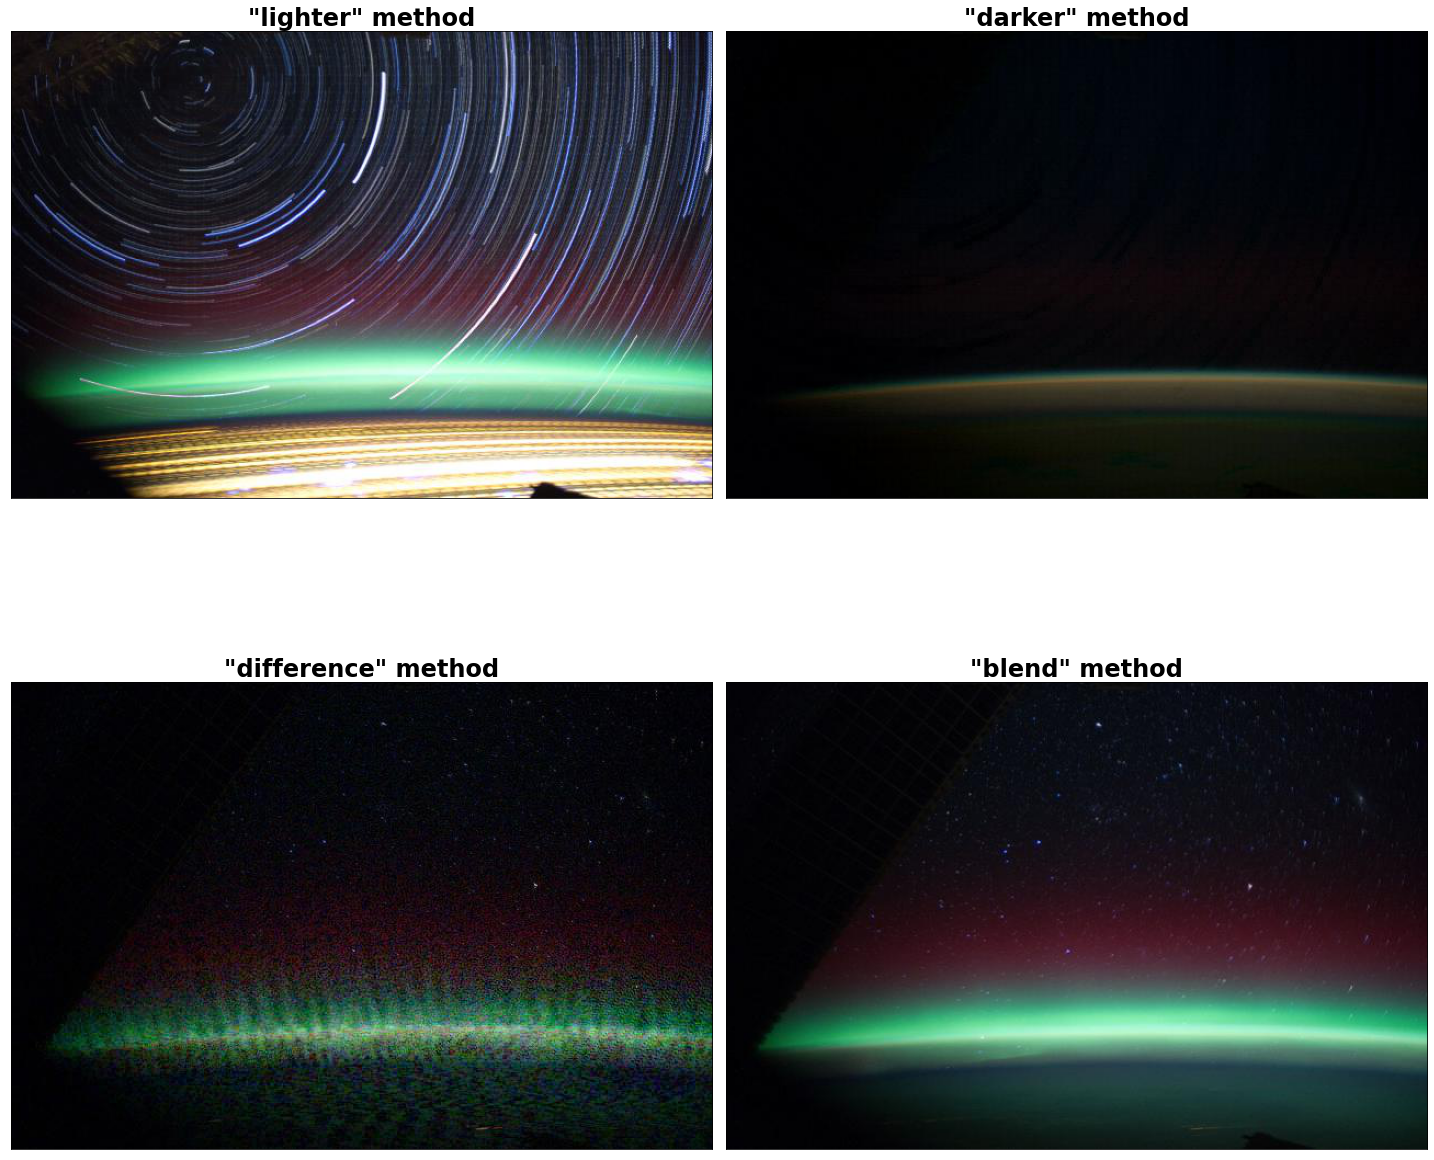

In [4]:
import imageio # this library can be used to read in image data (like JPG, PNG, etc)
from matplotlib import pyplot as plt


fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

fs = 24

ax1.set_title('"lighter" method',fontsize=fs,weight='bold')
ax1.imshow(imageio.imread('lighter.jpg'))

ax2.set_title('"darker" method',fontsize=fs,weight='bold')
ax2.imshow(imageio.imread('darker.jpg'))

ax3.set_title('"difference" method',fontsize=fs,weight='bold')
ax3.imshow(imageio.imread('difference.jpg'))

ax4.set_title('"blend" method',fontsize=fs,weight='bold')
ax4.imshow(imageio.imread('blend.jpg'))


#turn off all tick labels
ax1.set_xticks([])
ax1.set_yticks([])

ax2.set_xticks([])
ax2.set_yticks([])

ax3.set_xticks([])
ax3.set_yticks([])

ax4.set_xticks([])
ax4.set_yticks([])

fig.tight_layout(pad=1)
plt.show()

# The way that ImageChops stacks images differs by method.

## In the interest of producing star trails, which show the position of stars across all image frames, we want to stack our images where we keep the brightest pixels from one image to the next, which is what the "lighter" method does. 

## The other methods stack images differently.
 - "darker" tries to find pixels that find the darkest pixels from one image to the next.
 - "difference" tries to find the absolute value of the pixel-by-pixel difference from one image to the next.
 - "blend" tries to blend the pixels from one image to the next using a constant transparency weight (alpha).
    

# The Hard way

## So, to do this manually, we have a couple of challenges in front of us:
- we need a way to read in the image data for each image in our collection
- we need to find a way to figure out which images are brighter when comparing any 2 images in a sequence.
- we need a way to stack the images
- we need a way to save our stacked images

# Challenge #1: Reading in image data.

In past Sessions ([Like Session 11: Astropy](https://github.com/daxfeliz/cunybridgebootcamp/blob/main/notebooks/Notebook_11/11_Astropy.ipynb)), we covered reading image data from FITS files using Astropy. In this case, we don't have FITS files which contain meta data or image data. We only have JPG files which contain image data from the pixel information of the images. 

As shown earlier, we can use "imageio" to easily convert JPGs into image data that we can use.

We have  179 images
 
<class 'imageio.core.util.Array'>
(426, 640, 3)

[[[ 2  1  6]
  [ 3  2  7]
  [ 3  2  7]
  ...
  [ 2  1  9]
  [ 5  4 12]
  [11 10 18]]

 [[ 3  2  7]
  [ 3  2  7]
  [ 3  2  7]
  ...
  [ 3  2 10]
  [ 6  5 13]
  [10  9 17]]

 [[ 3  2  7]
  [ 4  3  8]
  [ 4  3  8]
  ...
  [ 5  4 12]
  [ 5  4 12]
  [ 4  3 11]]

 ...

 [[ 2  2  4]
  [ 2  2  4]
  [ 2  2  4]
  ...
  [23 19  7]
  [22 18  6]
  [23 19  8]]

 [[ 2  2  4]
  [ 2  2  4]
  [ 2  2  4]
  ...
  [27 23 12]
  [27 23 12]
  [26 22 11]]

 [[ 2  2  4]
  [ 2  2  4]
  [ 2  2  4]
  ...
  [27 23 12]
  [27 23 12]
  [26 22 11]]]
 


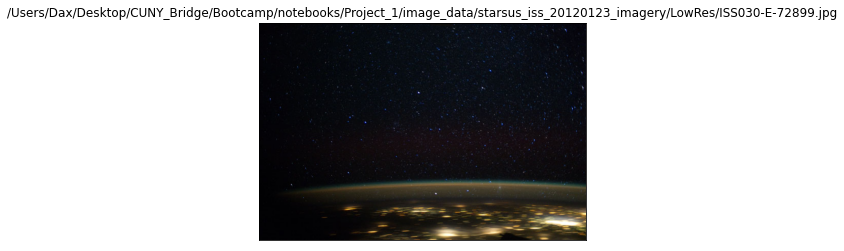

In [5]:
import imageio
from glob import glob
import numpy as np

## provided a path to our images, we can use "glob" to create a list of files 
## that all have the extension ".jpg" in this directory.

files = glob(image_path+'/*.jpg')
print('We have ',len(files),'images')
print(' ')

# let's use imageio to read in the first image in this list of images

image0 = imageio.imread(files[0])
print(type(image0))
print(np.shape(image0))
print('')
print(image0)
print(' ')


# we can use imshow from pyplot to visualize this image

plt.title(files[0])
plt.imshow(image0)
plt.xticks([])
plt.yticks([])
plt.show()

# Challenge #2: Comparing the image data of two images

As we see in the cell above, we can view the image data from each frame in our collection. Our image data gets read in as a 3 dimensional array (x values, y values, and pixel values). These pixel values range from 0 to 255, where each value represents a different Red Green Blue (RGB) color code.



In [6]:
print('min',np.nanmin(image0),'max',np.nanmax(image0))

min 0 max 255


With this in mind, we can use comparative statistics to figure out which image out of any 2 images are brighter than another. For example, let's read in the following image in our collection. And compare the min and max values:

In [7]:
image0 = imageio.imread(files[0])
image1 = imageio.imread(files[1])

print('image 0 min',np.nanmin(image0),'max',np.nanmax(image0))
print('image 1 min',np.nanmin(image1),'max',np.nanmax(image1))


image 0 min 0 max 255
image 1 min 0 max 255


# Since both images have the same scaling for their pixel values, we need to find another way to figure out which images are brighter. We can do this by calculating the cumulative sum of the pixel values to figure out which ones have lighter colors.

In [8]:
# Since the first two axes of our data are positional pixel coordinates, 
# we want to use the 3rd axis (index 2) of our image data for the pixel values

s0 = np.nansum(image0, axis=2)
s1 = np.nansum(image1, axis=2)
print(np.shape(image0),np.shape(s0))
print(' ')
# this will produce a 2D array containing the sum of color codes at each pixel
print(s0)
print('')
print(s1)


# from this, we can find the indices where one image has higher color code sums 
# in its pixels than another image. This will return a boolean 2D array where
# these conditions are true. 

print('')
print(s0 < s1)

(426, 640, 3) (426, 640)
 
[[ 9 12 12 ... 12 21 39]
 [12 12 12 ... 15 24 36]
 [12 15 15 ... 21 21 18]
 ...
 [ 8  8  8 ... 49 46 50]
 [ 8  8  8 ... 62 62 59]
 [ 8  8  8 ... 62 62 59]]

[[12 12 12 ... 32 14 20]
 [12 12 12 ... 29 11 14]
 [12 12 12 ... 23 11 20]
 ...
 [ 9  9  9 ... 58 56 59]
 [11  8  8 ... 47 47 43]
 [11  8  8 ... 47 47 43]]

[[ True False False ...  True False False]
 [False False False ...  True False False]
 [False False False ...  True False  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True False False ... False False False]
 [ True False False ... False False False]]


# Challenge # 3: Stacking the images

With our indices, we can now overwrite the dimmer image with the values from the brighter image. By doing this, we can then read in the next image from our collection for another iteration of comparing:

before [[[ 2  1  6]
  [ 3  2  7]
  [ 3  2  7]
  ...
  [ 2  1  9]
  [ 5  4 12]
  [11 10 18]]

 [[ 3  2  7]
  [ 3  2  7]
  [ 3  2  7]
  ...
  [ 3  2 10]
  [ 6  5 13]
  [10  9 17]]

 [[ 3  2  7]
  [ 4  3  8]
  [ 4  3  8]
  ...
  [ 5  4 12]
  [ 5  4 12]
  [ 4  3 11]]

 ...

 [[ 2  2  4]
  [ 2  2  4]
  [ 2  2  4]
  ...
  [23 19  7]
  [22 18  6]
  [23 19  8]]

 [[ 2  2  4]
  [ 2  2  4]
  [ 2  2  4]
  ...
  [27 23 12]
  [27 23 12]
  [26 22 11]]

 [[ 2  2  4]
  [ 2  2  4]
  [ 2  2  4]
  ...
  [27 23 12]
  [27 23 12]
  [26 22 11]]]

after [[[ 3  2  7]
  [ 3  2  7]
  [ 3  2  7]
  ...
  [ 8  8 16]
  [ 5  4 12]
  [11 10 18]]

 [[ 3  2  7]
  [ 3  2  7]
  [ 3  2  7]
  ...
  [ 7  7 15]
  [ 6  5 13]
  [10  9 17]]

 [[ 3  2  7]
  [ 4  3  8]
  [ 4  3  8]
  ...
  [ 5  5 13]
  [ 5  4 12]
  [ 4  4 12]]

 ...

 [[ 2  1  6]
  [ 2  1  6]
  [ 2  1  6]
  ...
  [23 19 16]
  [23 18 15]
  [24 19 16]]

 [[ 3  3  5]
  [ 2  2  4]
  [ 2  2  4]
  ...
  [27 23 12]
  [27 23 12]
  [26 22 11]]

 [[ 3  3  5]
  [ 2  2  4]
  

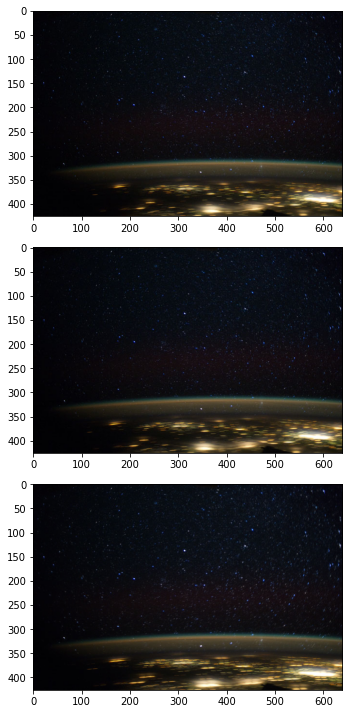

In [9]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(311)
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)

ax1.imshow(image0)
ax2.imshow(image1)

print('before',image0)
index = s0 < s1
image0[index, 0] = image1[index, 0]
image0[index, 1] = image1[index, 1]
image0[index, 2] = image1[index, 2]
print('')
print('after',image0)

# this difference may be too subtle to visually tell apart
ax3.imshow(image0)
fig.tight_layout(pad=1)
plt.show()


# Challenge #4: Saving our stacked images

With our stacked images, we can't just save them as they are. We need to normalize the scaling of our images and to save them as JPGs, we have to convert our image data into "8-bit unsigned integer" which ranges from 0 through 255.

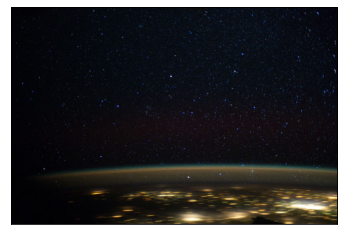

In [10]:
brightness_factor = 100 # this is a quick way to make our brighter image brighter/dimmer when stacking images

# rescaling and stacking our images
stacked_image = image0/np.nanmax(image0) + (image1/np.nanmax(image1))*brightness_factor
# rescaling will convert the values from a scale of 0 - 255 into a scale from 0 - 1

# by normalizing and multiplying by 255, we will have our data range from 0 - 255 again
stacked_image = ((stacked_image - np.nanmin(stacked_image))/ (np.nanmax(stacked_image)-np.nanmin(stacked_image))) * 255

# to enforce proper rescaling and normalization, we can round our image data
# and change the "dtype" to be np.uint8

stacked_image = np.round(stacked_image).astype(np.uint8)

# again, stacking just 2 images won't be visually obvious of the changes.
plt.imshow(stacked_image)
plt.xticks([])
plt.yticks([])
plt.show()

# now let's put it all together

In [11]:
import numpy as np
from glob import glob
import imageio

# This function allows us to place in the
# brightest pixels per x and y position between
# two images. It is similar to PIL's
# ImageChop.Lighter function.
def chop_lighter(image1, image2):
    s1 = np.nansum(image1, axis=2)
    s2 = np.nansum(image2, axis=2)
    

    index = s1 < s2
    image1[index, 0] = image2[index, 0]
    image1[index, 1] = image2[index, 1]
    image1[index, 2] = image2[index, 2]
    return image1 


def stack_images(imagepath,savepath,filename):

    # Getting the list of files in the directory
    files = glob(imagepath+'/*.jpg')

    # Opening up the first image for looping
    im1 = imageio.imread(files[0]).astype(np.float32)
    im2 = np.copy(im1)

    # Starting loop
    for i in range(1, len(files)):
        #print (i)
        im = imageio.imread(files[i]).astype(np.float32)
        # Same before
        im1 += im
        # im2 image shows star trails better
        im2 = chop_lighter(im2, im)

    stacked_image = (im1/np.nanmax(im1) + (im2/ np.nanmax(im2))*100 )

    def normalize8(I):
        mn = np.nanmin(I)
        mx = np.nanmax(I)
        I = ((I - mn)/ (mx-mn)) * 255
        return np.round(I).astype(np.uint8)


    stacked_image = normalize8(stacked_image)

    imageio.imwrite(savepath+filename,stacked_image )


In [12]:
filename='chop_lighter.jpg'
stack_images(image_path,save_path,filename)


# Let's see what our manually stacked image looks like compared to our "lighter" method using the ImageChops library

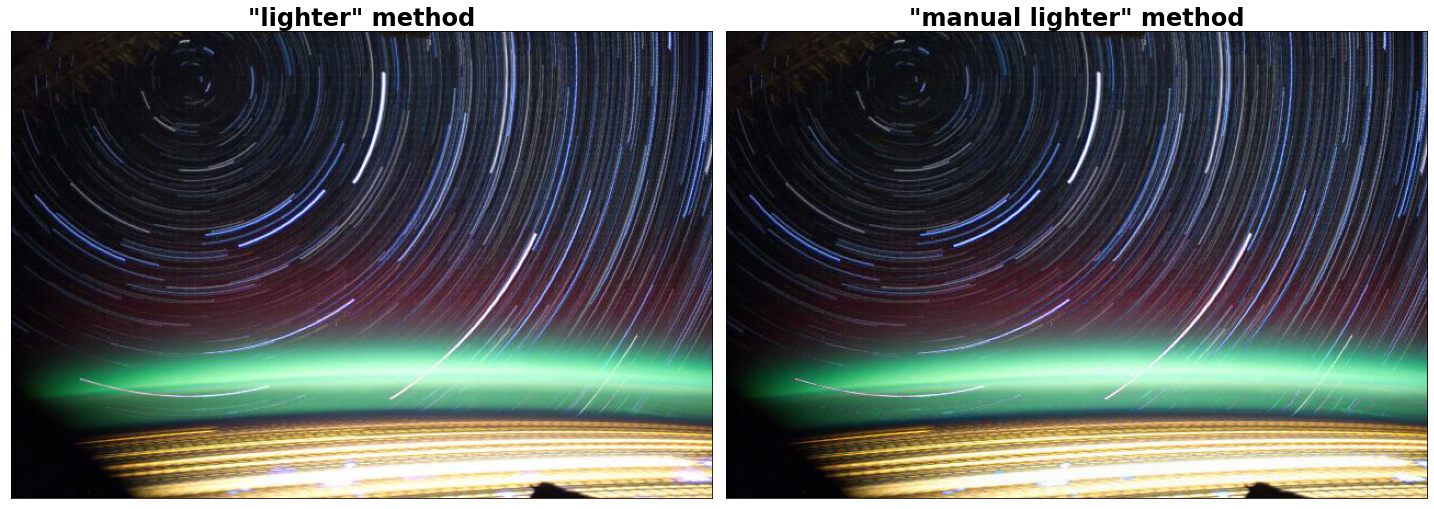

In [13]:
import imageio # this library can be used to read in image data (like JPG, PNG, etc)
from matplotlib import pyplot as plt


fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

fs = 24

ax1.set_title('"lighter" method',fontsize=fs,weight='bold')
ax1.imshow(imageio.imread('lighter.jpg'))

ax2.set_title('"manual lighter" method',fontsize=fs,weight='bold')
ax2.imshow(imageio.imread('chop_lighter.jpg'))


#turn off all tick labels
ax1.set_xticks([])
ax1.set_yticks([])

ax2.set_xticks([])
ax2.set_yticks([])


fig.tight_layout(pad=1)
plt.show()

# It looks REALLY CLOSE :D